<a href="https://colab.research.google.com/github/FGalvao77/DEPLOY-GRADIO/blob/main/IMPLEMENTA%C3%87%C3%83O_AUTOMATIZADA_DE_M%C3%81QUINAS_PREDITIVAS_DEPLOY_GRADIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTAÇÃO AUTOMATIZADA DE MÁQUINAS PREDITIVAS - DEPLOY GRADIO**

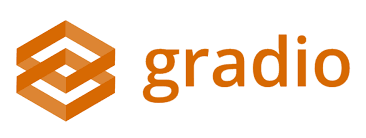

- https://gradio.app/
  - https://gradio.app/getting_started <br><br>
- https://github.com/gradio-app/gradio

In [1]:
# instalando a lib
!pip install gradio

     |████████████████████████████████| 3.4 MB 4.0 MB/s 
     |████████████████████████████████| 1.9 MB 47.2 MB/s 
     |████████████████████████████████| 206 kB 46.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 961 kB 58.1 MB/s 
     |████████████████████████████████| 3.0 MB 19.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=8a81b53f0be4af024ca2ffd0c38225986492597ac60bbe76d07c1a43ca491daa
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=5fc3851ae0f250a8eefff96804393a848517c0f84f6d52e2f9a8624ee63a9970
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


## **Funcionalidades para Ciência de Dados**

### **1) Exemplo de implementação de entrada de caracteres**

In [12]:
# criando uma interface de interação com o usuário

# importando a lib
import gradio as gr

# função para entrada de dados em caracteres
def greet(name):
  return 'E ai, ' + name + '! \nTudo bem?'

iface = gr.Interface(fn=greet, inputs='text', outputs='text')
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://17255.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7867/',
 'https://17255.gradio.app')

### **2) Exemplo de implementação de tratamentos de imagens**

In [13]:
# tratamento de imagens com o filtro sepia

# importando as libs
import gradio as gr
import numpy as np

# função para tratar a imagem
def sepia(img):
  sepia_filter = np.array([
      [.393, .769, .189],
      [.349, .686, .168], 
      [.272, .534, .131]
  ])

  sepia_img = img.dot(sepia_filter.T)
  sepia_img /= sepia_img.max()
  return sepia_img

iface = gr.Interface(sepia, 
                     gr.inputs.Image(shape=(200, 200)), 
                     'image')
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://50946.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7868/',
 'https://50946.gradio.app')

### **3) Exemplo de implementação de reconhecimento de imagens**

In [16]:
# reconhecimento de imagens

# importando as libs
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

# carregando o modelo
inception_net = tf.keras.applications.InceptionV3() 

# baixando rótulos legíveis por humanos para rede de imagens
response = requests.get('https://git.io/JJkYN')
labels = response.text.split('\n')

# função para reconhecer uma imagem
def classify_image(inp):
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, 
             outputs=label, 
             capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://21592.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7870/',
 'https://21592.gradio.app')

### **4) Sistema de saúde para detecção de doenças**

In [3]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=4bea2ca25cfbef4199158f6e41eb0cd7c3ea9a54324d1b014e2940c199459940
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [4]:
import gradio as gr 
import numpy as np
from fpdf import FPDF
import os
import tempfile

In [8]:
# detecção de doenças
def disease_report(img, scan_for, generate_report):
  results = []

  for i, mode in enumerate(['Red', 'Green', 'Blue']):
    color_filter = np.array([0, 0, 0])
    color_filter[i] = 1
    results.append([mode, img + color_filter])

  tmp_dir = tempfile.gettempdir()
  report = os.path.join(tmp_dir, 'report.pdf')

  if generate_report:
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font('Arial', size=15)
    pdf.cell(200, 10, txt='Disease Report', 
             ln=1, align='C')
    pdf.cell(200, 10, txt='A Gradio Demo', 
             ln=2, align='C')
    pdf.output(report)
  return results, report if generate_report else None

iface = gr.Interface(disease_report, 
                     [
                      'image', 
                      gr.inputs.CheckboxGroup(
                          ['Cancer', 
                           'Rash', 
                           'Heart Failure', 
                           'Stroke', 
                           'Diabetes', 
                           'Pneumonia']), 'checkbox'],
                     
                     [
                      gr.outputs.Carousel(['text','image'], label='Disease'), 
                      gr.outputs.File(label='Report')
                     ], 

                     title='Disease Report', 
                     description='Upload an Xray and select the diseases to scan for.',
                     theme='compact',
                     flagging_options=['good', 'bad', 'etc'], 
                     allow_flagging='auto'
                     )

if __name__ == '__main__':
  iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://25690.gradio.app
Interface loading below...


### **5) Sistema de previsão de preço de ativos financeiros**

In [12]:
import gradio as gr
import random
import matplotlib.pyplot as plt
import numpy as np

def plot_forecast(final_year, companies, noise, 
                  show_legend, point_style):
  
  start_year = 2020

  x = np.arange(start_year, final_year + 1)
  year_count = x.shape[0]
  plt_format = ({'cross': 'X',
                 'line': '-', 
                 'circle': 'o--'})[point_style]
  fig = plt.figure()
  ax = fig.add_subplot(111)

  for i, company in enumerate(companies):
    series = np.arange(0, year_count, dtype=float)
    series = series ** 2 * (i + 1)
    series += np.random.rand(year_count) * noise
    ax.plot(x, series, plt_format)

  if show_legend:
    plt.legend(companies)
  plt.close()
  return fig

iface = gr.Interface(plot_forecast, 
                     [
                      gr.inputs.Radio([2025, 2030, 2035, 2040], 
                                      label =  'Project to:'),
                      gr.inputs.CheckboxGroup(
                          ['Google', 'Microsoft', 'Gradio'], label = 'Company Selection:'), 
                      gr.inputs.Slider(1, 100, label='Noise Level:'), 
                      gr.inputs.Checkbox(label='Show Legend'), 
                      gr.inputs.Dropdown(['cross', 'line', 'circle'], label='Style:'),
                     ], 
                     gr.outputs.Image(plot=True, label='forcast')
                     )

if __name__ == '__main__':
  iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://32527.gradio.app
Interface loading below...


### **6) Sistema de previsão de vendas dos funcionários**

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://26316.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7875/',
 'https://26316.gradio.app')

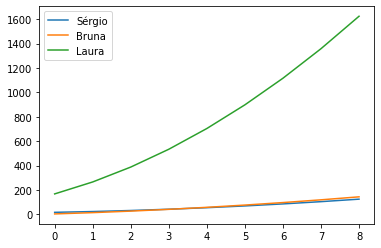

In [24]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sales_projections(employee_data):
  sales_data = employee_data.iloc[:, 1:4].astype('int').to_numpy()
  regression_values = np.apply_along_axis(
      lambda row:
      np.array(np.poly1d(np.polyfit([0, 1, 2], 
                                    row, 2))), 
                                    0, sales_data)
  
  projected_months = np.repeat(np.expand_dims(
      np.arange(3, 12), 0), 
      len(sales_data), axis=0)
  
  projected_values = np.array([
                               month * month * regression[0] + month * regression[1] + regression[2]
                               for month, regression in zip(projected_months, regression_values)])
  
  plt.plot(projected_values.T)
  plt.legend(employee_data['Name'])
  return employee_data, plt.gcf(), regression_values

iface = gr.Interface(sales_projections, 
                     gr.inputs.Dataframe(
                         headers=['Name', 'Jan Sales', 'Feb Sales', 'Mar Sales'], 
                         default=[['Sérgio', 12, 14, 18.38],
                                  ['Bruna', 24, 17.07, 12],
                                  ['Laura', 18.14, 19.5, 25]]
                     ), 
                     [ 
                      'dataframe', 
                      'plot', 
                      'numpy'
                     ], 
                     description='Enter sales figure for employees to predict sales trajectory over year.'
)
iface.launch()